In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Opciones
platos = [
    "Pollo grillado con puré", "Milanesa con arroz", "Ensalada de quinoa",
    "Tarta de espinaca", "Wok de vegetales", "Pescado con batatas",
    "Albóndigas con fideos", "Omelette de claras", "Lentejas estofadas",
    "Pastel de papa vegetariano"
]

categorias = ["Saludable", "Clásica", "Vegetariana", "Fitness", "Sin TACC"]
medios_pago = ["Efectivo", "Transferencia", "MercadoPago", "Débito"]
sucursales = ["Palermo", "Caballito", "Online"]
clientes = ["Particular", "Empresa", "Estudiante", "Jubilado"]
comentarios = ["Muy rico", "Recomendado", "Frío", "Excelente", "No me gustó", "", None]

# Generar 1000 filas
data = []
for i in range(1000):
    fecha = datetime(2025, 5, 1) + timedelta(days=random.randint(0, 60))
    plato = random.choice(platos)
    categoria = random.choice(categorias)
    precio = random.randint(3500, 6000)
    cantidad = random.randint(1, 3)
    total = precio * cantidad
    pago = random.choice(medios_pago)
    sucursal = random.choice(sucursales)
    tipo_cliente = random.choice(clientes)
    calificacion = random.choice([1, 2, 3, 4, 5, None])
    comentario = random.choice(comentarios)
    entrega = random.choice(["Retiro", "Delivery"])

    data.append([
        fecha.date(), f"Cliente{i:04}", plato, categoria,
        precio, cantidad, total, pago, sucursal,
        tipo_cliente, calificacion, comentario, entrega
    ])

# Columnas
columnas = [
    "Fecha", "Cliente_ID", "Plato", "Categoría", "Precio_unitario", "Cantidad",
    "Total", "Medio_pago", "Sucursal", "Tipo_cliente", "Calificación",
    "Comentario", "Entrega"
]

# Crear DataFrame
df = pd.DataFrame(data, columns=columnas)

# Mostrar primeras filas
df.head()


,Fecha,Cliente_ID,Plato,Categoría,Precio_unitario,Cantidad,Total,Medio_pago,Sucursal,Tipo_cliente,Calificación,Comentario,Entrega
0,2025-06-26,Cliente0000,Milanesa con arroz,Vegetariana,4182,2,8364,MercadoPago,Online,Empresa,1.0,,Retiro
1,2025-05-25,Cliente0001,Albóndigas con fideos,Sin TACC,3525,3,10575,Débito,Palermo,Jubilado,3.0,,Retiro
2,2025-06-28,Cliente0002,Wok de vegetales,Clásica,3822,2,7644,Débito,Online,Jubilado,4.0,No me gustó,Delivery
3,2025-05-30,Cliente0003,Lentejas estofadas,Clásica,4979,3,14937,Transferencia,Online,Jubilado,5.0,None,Delivery
4,2025-06-26,Cliente0004,Wok de vegetales,Clásica,4879,3,14637,Transferencia,Online,Particular,1.0,No me gustó,Delivery


In [9]:
# Guardar el DataFrame como archivo CSV
df.to_csv("viandas_dataset.csv", index=False)


/tmp/ipython-input-6-2349609112.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Tipo_cliente", palette="pastel")


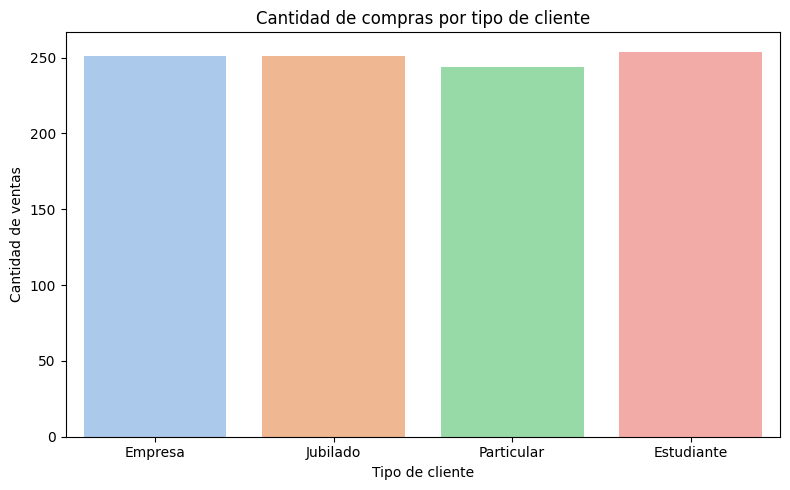

In [6]:
# Gráfico de cantidad de compras por tipo de cliente
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Tipo_cliente", palette="pastel")
plt.title("Cantidad de compras por tipo de cliente")
plt.xlabel("Tipo de cliente")
plt.ylabel("Cantidad de ventas")
plt.tight_layout()
plt.show()


Diagnóstico:
Este gráfico permite ver cuál es el tipo de cliente que más compra en la empresa de viandas. Con esta información se pueden tomar decisiones comerciales como enfocar promociones o publicidades para un grupo específico (por ejemplo, estudiantes o jubilados).



In [3]:
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Análisis de valores perdidos
valores_nulos = df.isnull().sum()
print("Valores perdidos por columna:\n")
print(valores_nulos)


Valores perdidos por columna:

Fecha                0
Cliente_ID           0
Plato                0
Categoría            0
Precio_unitario      0
Cantidad             0
Total                0
Medio_pago           0
Sucursal             0
Tipo_cliente         0
Calificación       160
Comentario         130
Entrega              0
dtype: int64


Diagnóstico de valores perdidos:
En el análisis se identificaron valores faltantes en las columnas de “Calificación” y “Comentario”. Esto puede deberse a clientes que no dejaron opinión o no calificaron su experiencia. Para continuar el análisis, se podrían reemplazar esos valores por un valor estándar (como “Sin comentario” o 0) o simplemente excluirlos de ciertos cálculos si no afectan al resultado general.



/tmp/ipython-input-8-3686114183.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=calificacion_categoria.index, y=calificacion_categoria.values, palette="coolwarm")


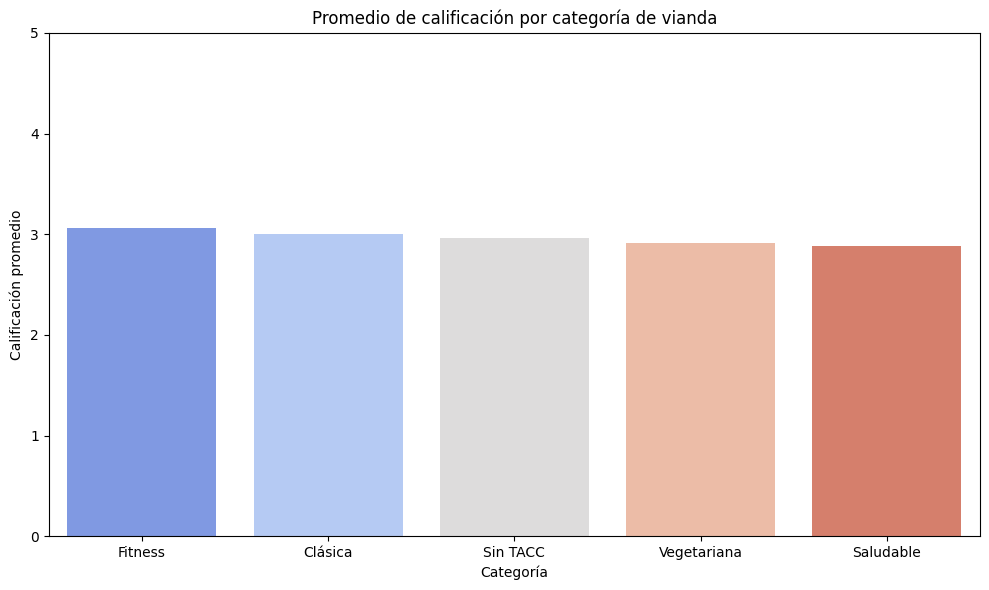

In [8]:
# Calificación promedio por categoría
calificacion_categoria = df.groupby("Categoría")["Calificación"].mean().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(x=calificacion_categoria.index, y=calificacion_categoria.values, palette="coolwarm")
plt.title("Promedio de calificación por categoría de vianda")
plt.xlabel("Categoría")
plt.ylabel("Calificación promedio")
plt.ylim(0, 5)  # porque la calificación va de 1 a 5
plt.tight_layout()
plt.show()


Diagnóstico:
Este gráfico muestra qué tipo de vianda recibe mejores calificaciones por parte de los clientes. Esto puede estar relacionado con la calidad percibida, el gusto personal o el tipo de cliente. Saber qué categoría tiene mayor satisfacción permite reforzar esos platos o mejorar los de menor calificación.


